## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  72.141615  1284.654503  0.812445  8.121505  1.508523
1  20.205812  1710.545900  0.757118  6.946307  1.498130
2  36.181855  1269.567754  0.055048  1.268898  1.058516
3   2.511543  1428.251797  0.439931  5.354024  1.598323
4  66.549231   255.959331  0.163246  4.516262  0.638208


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9090174	total: 69.2ms	remaining: 1m 9s
1:	learn: 0.9001496	total: 69.9ms	remaining: 34.9s
2:	learn: 0.8895526	total: 70.3ms	remaining: 23.4s
3:	learn: 0.8804176	total: 70.8ms	remaining: 17.6s
4:	learn: 0.8707774	total: 71.3ms	remaining: 14.2s
5:	learn: 0.8610464	total: 72ms	remaining: 11.9s
6:	learn: 0.8524382	total: 72.5ms	remaining: 10.3s
7:	learn: 0.8434733	total: 73.1ms	remaining: 9.06s
8:	learn: 0.8341957	total: 73.6ms	remaining: 8.1s
9:	learn: 0.8238796	total: 74.1ms	remaining: 7.34s
10:	learn: 0.8167441	total: 74.6ms	remaining: 6.71s
11:	learn: 0.8088790	total: 75.1ms	remaining: 6.18s
12:	learn: 0.8014155	total: 75.6ms	remaining: 5.74s
13:	learn: 0.7935287	total: 76.2ms	remaining: 5.36s
14:	learn: 0.7841533	total: 76.6ms	remaining: 5.03s
15:	learn: 0.7772705	total: 77.2ms	remaining: 4.75s
16:	learn: 0.7683742	total: 77.6ms	remaining: 4.49s
17:	learn: 0.7597481	total: 78.1ms	remaining: 4.26s
18:	learn: 0.7535874	total: 78.7ms	remaining: 4

87:	learn: 0.4181858	total: 109ms	remaining: 1.13s
88:	learn: 0.4156207	total: 110ms	remaining: 1.12s
89:	learn: 0.4130033	total: 110ms	remaining: 1.11s
90:	learn: 0.4100559	total: 111ms	remaining: 1.11s
91:	learn: 0.4077060	total: 112ms	remaining: 1.1s
92:	learn: 0.4043737	total: 112ms	remaining: 1.09s
93:	learn: 0.4011023	total: 113ms	remaining: 1.08s
94:	learn: 0.3980292	total: 113ms	remaining: 1.08s
95:	learn: 0.3951455	total: 114ms	remaining: 1.07s
96:	learn: 0.3921966	total: 114ms	remaining: 1.06s
97:	learn: 0.3888436	total: 114ms	remaining: 1.05s
98:	learn: 0.3862961	total: 115ms	remaining: 1.05s
99:	learn: 0.3836593	total: 115ms	remaining: 1.04s
100:	learn: 0.3813072	total: 116ms	remaining: 1.03s
101:	learn: 0.3790831	total: 117ms	remaining: 1.03s
102:	learn: 0.3770143	total: 117ms	remaining: 1.02s
103:	learn: 0.3743719	total: 117ms	remaining: 1.01s
104:	learn: 0.3717785	total: 118ms	remaining: 1s
105:	learn: 0.3697553	total: 118ms	remaining: 996ms
106:	learn: 0.3670622	total: 

267:	learn: 0.1697426	total: 187ms	remaining: 510ms
268:	learn: 0.1693927	total: 187ms	remaining: 509ms
269:	learn: 0.1690039	total: 188ms	remaining: 507ms
270:	learn: 0.1683692	total: 188ms	remaining: 506ms
271:	learn: 0.1675828	total: 188ms	remaining: 504ms
272:	learn: 0.1670136	total: 189ms	remaining: 503ms
273:	learn: 0.1667495	total: 189ms	remaining: 502ms
274:	learn: 0.1660093	total: 190ms	remaining: 500ms
275:	learn: 0.1655636	total: 190ms	remaining: 499ms
276:	learn: 0.1649482	total: 191ms	remaining: 498ms
277:	learn: 0.1642219	total: 191ms	remaining: 496ms
278:	learn: 0.1638745	total: 192ms	remaining: 495ms
279:	learn: 0.1632172	total: 192ms	remaining: 493ms
280:	learn: 0.1628844	total: 192ms	remaining: 492ms
281:	learn: 0.1622135	total: 193ms	remaining: 490ms
282:	learn: 0.1616370	total: 193ms	remaining: 489ms
283:	learn: 0.1609802	total: 193ms	remaining: 487ms
284:	learn: 0.1603845	total: 194ms	remaining: 486ms
285:	learn: 0.1599336	total: 194ms	remaining: 485ms
286:	learn: 

503:	learn: 0.0817263	total: 292ms	remaining: 287ms
504:	learn: 0.0814086	total: 293ms	remaining: 287ms
505:	learn: 0.0813204	total: 293ms	remaining: 286ms
506:	learn: 0.0811123	total: 293ms	remaining: 285ms
507:	learn: 0.0809071	total: 294ms	remaining: 284ms
508:	learn: 0.0808212	total: 294ms	remaining: 284ms
509:	learn: 0.0804977	total: 294ms	remaining: 283ms
510:	learn: 0.0804129	total: 295ms	remaining: 282ms
511:	learn: 0.0802131	total: 295ms	remaining: 281ms
512:	learn: 0.0799590	total: 296ms	remaining: 281ms
513:	learn: 0.0798762	total: 296ms	remaining: 280ms
514:	learn: 0.0795636	total: 296ms	remaining: 279ms
515:	learn: 0.0794818	total: 296ms	remaining: 278ms
516:	learn: 0.0793203	total: 297ms	remaining: 277ms
517:	learn: 0.0790397	total: 297ms	remaining: 277ms
518:	learn: 0.0789597	total: 298ms	remaining: 276ms
519:	learn: 0.0786547	total: 298ms	remaining: 275ms
520:	learn: 0.0783906	total: 299ms	remaining: 275ms
521:	learn: 0.0783121	total: 299ms	remaining: 274ms
522:	learn: 

679:	learn: 0.0470285	total: 369ms	remaining: 173ms
680:	learn: 0.0469468	total: 369ms	remaining: 173ms
681:	learn: 0.0469054	total: 369ms	remaining: 172ms
682:	learn: 0.0467909	total: 370ms	remaining: 172ms
683:	learn: 0.0467120	total: 370ms	remaining: 171ms
684:	learn: 0.0466718	total: 371ms	remaining: 171ms
685:	learn: 0.0465078	total: 371ms	remaining: 170ms
686:	learn: 0.0463255	total: 371ms	remaining: 169ms
687:	learn: 0.0462856	total: 372ms	remaining: 169ms
688:	learn: 0.0461747	total: 372ms	remaining: 168ms
689:	learn: 0.0460152	total: 373ms	remaining: 167ms
690:	learn: 0.0459065	total: 373ms	remaining: 167ms
691:	learn: 0.0458674	total: 374ms	remaining: 166ms
692:	learn: 0.0457013	total: 374ms	remaining: 166ms
693:	learn: 0.0456627	total: 374ms	remaining: 165ms
694:	learn: 0.0455054	total: 375ms	remaining: 164ms
695:	learn: 0.0453787	total: 375ms	remaining: 164ms
696:	learn: 0.0452244	total: 376ms	remaining: 163ms
697:	learn: 0.0450997	total: 376ms	remaining: 163ms
698:	learn: 

917:	learn: 0.0245416	total: 474ms	remaining: 42.3ms
918:	learn: 0.0245244	total: 475ms	remaining: 41.8ms
919:	learn: 0.0245002	total: 475ms	remaining: 41.3ms
920:	learn: 0.0244526	total: 476ms	remaining: 40.8ms
921:	learn: 0.0244355	total: 476ms	remaining: 40.3ms
922:	learn: 0.0243825	total: 477ms	remaining: 39.8ms
923:	learn: 0.0243585	total: 477ms	remaining: 39.2ms
924:	learn: 0.0243348	total: 477ms	remaining: 38.7ms
925:	learn: 0.0242888	total: 478ms	remaining: 38.2ms
926:	learn: 0.0242368	total: 478ms	remaining: 37.6ms
927:	learn: 0.0241442	total: 478ms	remaining: 37.1ms
928:	learn: 0.0241208	total: 479ms	remaining: 36.6ms
929:	learn: 0.0240976	total: 479ms	remaining: 36.1ms
930:	learn: 0.0240529	total: 479ms	remaining: 35.5ms
931:	learn: 0.0240088	total: 480ms	remaining: 35ms
932:	learn: 0.0239585	total: 480ms	remaining: 34.5ms
933:	learn: 0.0238806	total: 480ms	remaining: 33.9ms
934:	learn: 0.0238307	total: 481ms	remaining: 33.4ms
935:	learn: 0.0237816	total: 481ms	remaining: 32

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

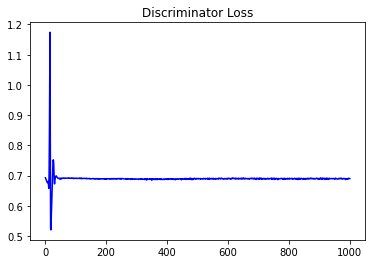

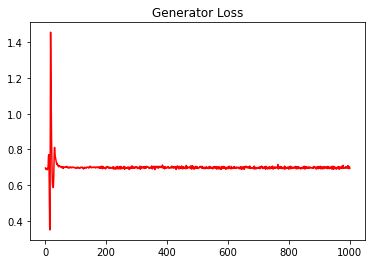

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.3900407429184555


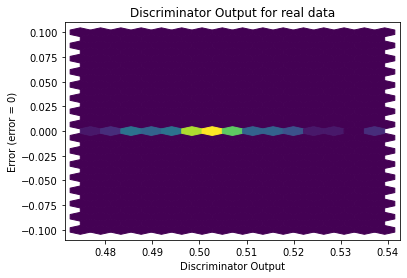

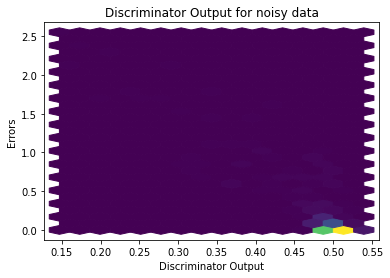

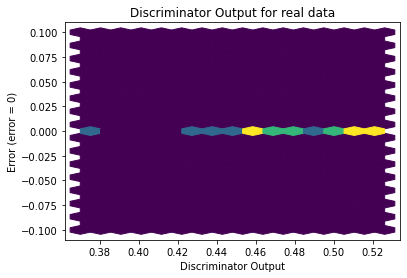

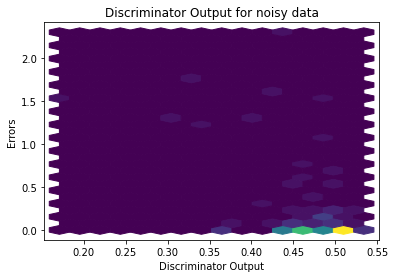

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


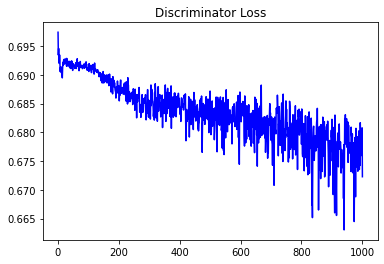

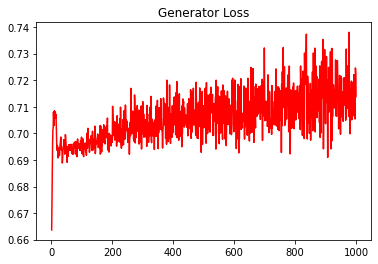

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.24965845431431424


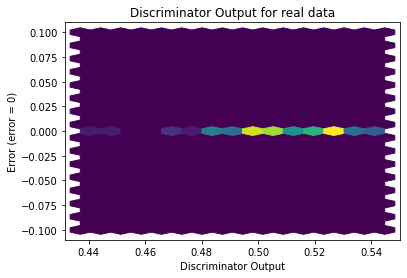

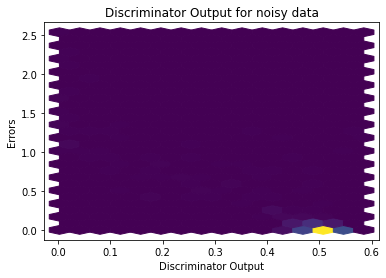

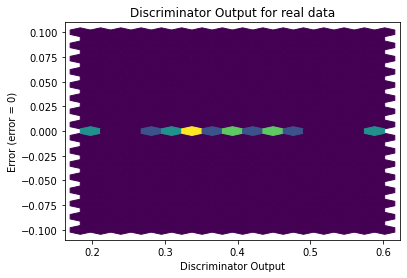

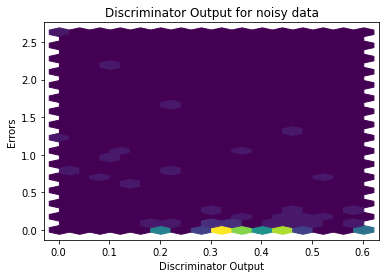

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3522]], requires_grad=True)
